In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
AdmissionDF = pd.read_csv('Admission_Predict.csv')

In [4]:
AdmissionDF.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
AdmissionDF = AdmissionDF.drop(labels=['Serial No.'], axis=1)
AdmissionDF.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
AdmissionDF.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
admission = []
for i in AdmissionDF['Chance of Admit ']:
    if(i>=0.85):
        admission.append(1)
    else:
        admission.append(0)

AdmissionDF['Admission'] = admission

In [11]:
AdmissionDF

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admission
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,0
2,316,104,3,3.0,3.5,8.00,1,0.72,0
3,322,110,3,3.5,2.5,8.67,1,0.80,0
4,314,103,2,2.0,3.0,8.21,0,0.65,0
...,...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82,0
396,325,107,3,3.0,3.5,9.11,1,0.84,0
397,330,116,4,5.0,4.5,9.45,1,0.91,1
398,312,103,3,3.5,4.0,8.78,0,0.67,0


In [12]:
AdmissionDF = AdmissionDF.drop(labels = ['Chance of Admit '], axis=1)
AdmissionDF

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0
396,325,107,3,3.0,3.5,9.11,1,0
397,330,116,4,5.0,4.5,9.45,1,1
398,312,103,3,3.5,4.0,8.78,0,0


In [13]:
from sklearn.model_selection import train_test_split
X = AdmissionDF.drop(columns = 'Admission')
Y = AdmissionDF['Admission']

In [14]:
print(X)
print(Y)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
395        324          110                  3  3.5   3.5  9.04         1
396        325          107                  3  3.0   3.5  9.11         1
397        330          116                  4  5.0   4.5  9.45         1
398        312          103                  3  3.5   4.0  8.78         0
399        333          117                  4  5.0   4.0  9.66         1

[400 rows x 7 columns]
0      1
1      0
2      0
3      0
4      0
      ..
395    0
396    0
397    1
398    

In [15]:
AdmissionDF.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.640516
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.671785
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.648336
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.579188
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.547431
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.695317
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.438027
Admission,0.640516,0.671785,0.648336,0.579188,0.547431,0.695317,0.438027,1.000000


In [16]:
AdmissionDF.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admission            0
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8, random_state=1)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
93         301           97                  2  3.0   3.0  7.88         1
23         334          119                  5  5.0   4.5  9.70         1
299        305          112                  3  3.0   3.5  8.65         0
13         307          109                  3  4.0   3.0  8.00         1
90         318          106                  2  4.0   4.0  7.92         1
..         ...          ...                ...  ...   ...   ...       ...
255        307          110                  4  4.0   4.5  8.37         0
72         321          111                  5  5.0   5.0  9.45         1
396        325          107                  3  3.0   3.5  9.11         1
235        326          111                  5  4.5   4.0  9.23         1
37         300          105                  1  1.0   2.0  7.80         0

[320 rows x 7 columns]
     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
398        312

In [19]:
#Import the class
from sklearn.tree import DecisionTreeClassifier

In [20]:
classifier = DecisionTreeClassifier(random_state=0)

In [21]:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [22]:
Y_pred = classifier.predict(X_test)

In [23]:
result  = pd.DataFrame({
    'actual' : Y_test,
    'predicted' : Y_pred
})

In [24]:
result

,actual,predicted
398,0,0
125,0,0
328,0,0
339,0,0
172,1,1
...,...,...
347,0,0
41,0,0
180,0,0
132,0,0


In [25]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

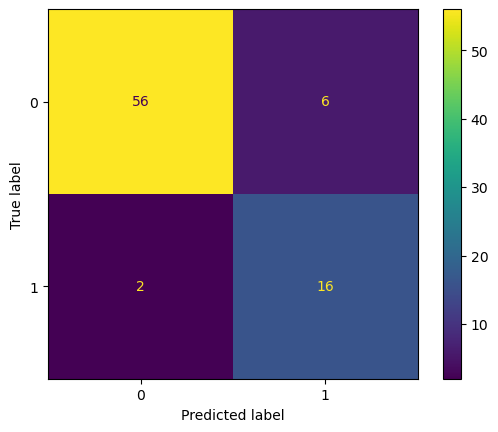

In [26]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)

In [27]:
accuracy_score(Y_test, Y_pred)

0.9

In [28]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        62
           1       0.73      0.89      0.80        18

    accuracy                           0.90        80
   macro avg       0.85      0.90      0.87        80
weighted avg       0.91      0.90      0.90        80



In [29]:
new = [[307,110,4,4.0,4.5,8.37,0]]
classifier.predict(new)[0]

E:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0

In [31]:
new = [[326,111,5,4.5,4.0,9.23,1]]
classifier.predict(new)[0]

E:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

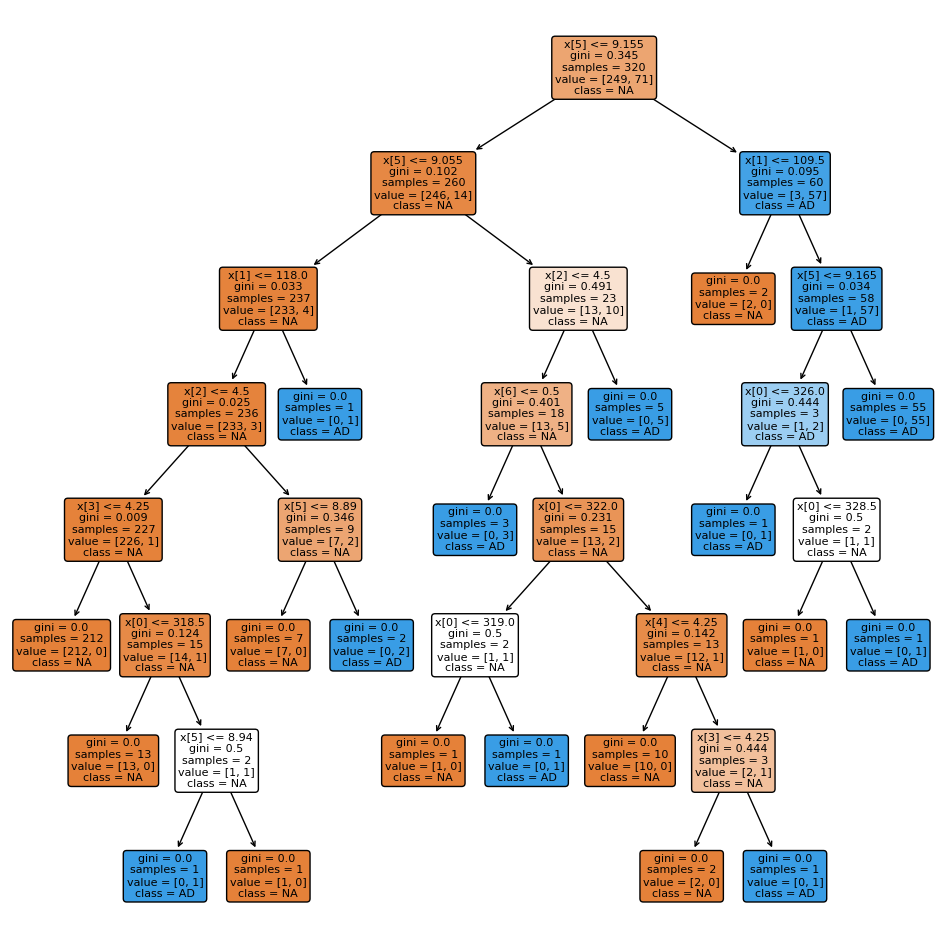

In [41]:
plt.figure(figsize=(12,12))
plot_tree(classifier, fontsize=8, filled=True, rounded=True, class_names=['NA','AD']);